# Random Forest with Recursive Feature Selection and CV - with class_weight=balanced Data from MinMaxScaler

In [1]:
import pickle
import numpy as np
from datetime import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc



In [2]:
X_train, X_test, y_train, y_test = pickle.load( open( "../pickles/intercorr_app2_MinMaxScaler_20210711_214137.pickle", "rb" ) )

In [ ]:
min_features_to_select = 1  # Minimum number of features to consider
nrtrees = 1000
depth = 5
steps = 1
jobs = 96 # nb of cpus to use

rfecv_results = {}

start = dt.now()
for sco, sc in scoring.items():
    rfecv = RFECV(estimator=RandomForestClassifier(max_depth=depth, class_weight='balanced', n_estimators=nrtrees, n_jobs=jobs), step=steps, cv=StratifiedKFold(5),
              scoring=sc,
              min_features_to_select=min_features_to_select)
    
    rfecv.fit(X_train, np.ravel(y_train,order='C'))
    rfecv_results[sco] = rfecv


end = dt.now()
diff = end-start

print('Duration of calculations: %s' %diff)

Optimized for f1-score: -- Evaluation with Training Set 

Balanced Accuracy:  0.9500610703975128
Accuracy :  0.9381107491856677
f1-score :  0.9569160997732427
Recall :  0.9254385964912281
Specificity :  0.9746835443037974
---------------

Optimized for f1-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.6443452380952381
Accuracy :  0.7207792207792207
f1-score :  0.8088888888888888
Recall :  0.8125
Specificity :  0.47619047619047616


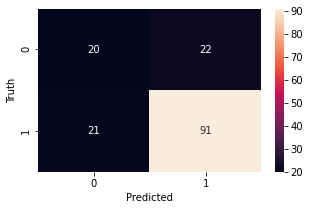




Optimized for recall-score: -- Evaluation with Training Set 

Balanced Accuracy:  0.950185987119698
Accuracy :  0.9413680781758957
f1-score :  0.9593679458239277
Recall :  0.9320175438596491
Specificity :  0.9683544303797469
---------------

Optimized for recall-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.6116071428571428
Accuracy :  0.6948051948051948
f1-score :  0.7911111111111111
Recall :  0.7946428571428571
Specificity :  0.42857142857142855


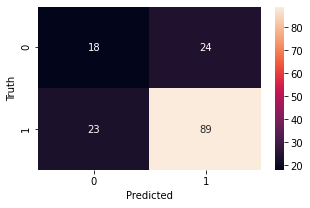




Optimized for specificity-score: -- Evaluation with Training Set 

Balanced Accuracy:  0.8477681545636242
Accuracy :  0.8322475570032574
f1-score :  0.8783943329397875
Recall :  0.8157894736842105
Specificity :  0.879746835443038
---------------

Optimized for specificity-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5922619047619048
Accuracy :  0.6233766233766234
f1-score :  0.7184466019417476
Recall :  0.6607142857142857
Specificity :  0.5238095238095238


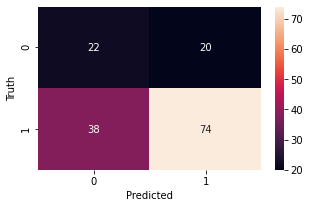

In [5]:
for k,v in rfecv_results.items():

    print('============================================================================')
    print('Optimized for %s-score: -- Evaluation with Training Set \n' %(k))
    y_predicted = rfecv_results[k].predict(X_train)
    print('Balanced Accuracy: ', balanced_accuracy_score(y_train, y_predicted))
    print('Accuracy : ', accuracy_score(y_train, y_predicted))
    print('f1-score : ', f1_score(y_train, y_predicted))
    print('Recall : ' , recall_score(y_train, y_predicted))

    print('Specificity : ', recall_score(y_train, y_predicted, pos_label=0) )
    print('---------------\n')

    print('Optimized for %s-score: -- Confusion Matrix and External Evaluation \n' %(k))
    y_predicted = rfecv_results[k].predict(X_test)
    cm1 = confusion_matrix(y_test, y_predicted)
    
    print('Balanced Accuracy: ', balanced_accuracy_score(y_test, y_predicted))
    print('Accuracy : ', accuracy_score(y_test, y_predicted))
    print('f1-score : ', f1_score(y_test, y_predicted))
    print('Recall : ' , recall_score(y_test, y_predicted))


    print('Specificity : ', recall_score(y_test, y_predicted, pos_label=0) )

    # Visualize it as a heatmap
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(5,3))
    sn.heatmap(cm1,annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print('\n\n')

In [3]:
scoring = {'f1' : 'f1',
           'recall': 'recall',
           #'precision' : 'precision',
          'specificity' : make_scorer(recall_score, pos_label=0),
           }

In [6]:
out = (rfecv_results)
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = 'RFECV_MinMax_balanced_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(out, filehandler)